In [439]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [284]:
lnr = pd.read_csv('C:\\Users\\User\\Downloads\\lr.csv')
lgr = pd.read_csv('C:\\Users\\User\\Downloads\\lgr.csv')
mlr = pd.read_csv('C:\\Users\\User\\Downloads\\mlr.csv', index_col = 0)
for col in mlr.columns:
    mlr[col] = pd.to_numeric(mlr[col], errors='coerce') 
    # mlr[col] = mlr[col].astype(float)


In [37]:
def missing_values(df):
    # print(df)
    return df.fillna(df.mean())

In [39]:
def drop_duplicates(df):
    return df.drop_duplicates()

In [58]:
def outliers(df):
    for x in df.columns:
        i = df[x]
        q1, q3 = np.percentile(i, 25), np.percentile(i, 75)
        iqr = q3 - q1
        lower_bound, upper_bound = q1 - (1.5 * iqr), q3 + (1.5 * iqr)
        lower_inds, upper_inds = df[i < q1].index, df[i > q3].index
        df.loc[lower_inds, x] = lower_bound
        df.loc[upper_inds, x] = upper_bound
        print(x, lower_bound, upper_bound)
    # print(df)
    return df
    

In [77]:
def unit_norm(df):
    for x in df.columns:
        i = df[x]
        mmin, mmax = min(i), max(i)
        df[x] = (i - mmin) / (mmax - mmin)
    # print(df)
    return df
    
def zscore_norm(df):
    for x in df.columns:
        i = df[x]
        mn, sd = np.mean(i), np.std(i)
        df[x] = (i - mn) / (sd)
    return df


In [95]:
def fix(df):
    return unit_norm((drop_duplicates(missing_values(df))))

linear = fix(lnr)
linear
# log = fix(lgr)
# mlt = fix(mlr)

,x,y
0,0.006799,0.225260
1,0.014164,0.455183
2,0.004249,0.186836
3,0.010764,0.358671
4,0.024645,0.808515
...,...,...
695,0.016430,0.553936
696,0.026344,0.477202
697,0.023228,0.820180
698,0.018696,0.598773


# Linear Regression

In [542]:
class Linear_Regression:
    def __init__(self, lr=0.001, iters=10000):
        self.iters = iters
        self.lr = lr
    def train(self, X, Y):
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        # print(X.shape)
        # self.thetas = np.random.randint(low=int(min(X[0])), high=int(max(X[0])+1), size=(X.shape[1],1))
        self.thetas = np.random.randn(X.shape[1],1)
        gd = 0
        for i in range(self.iters):
            # print(self.derivative_of_cost(X, Y).shape, self.thetas.shape)
            self.thetas -= self.lr * self.derivative_of_cost(X, Y)
            if i % 1000 == 0:
                print('Loss at', i,' is', self.cost(X,Y))
        return self.thetas, self.hyp(X)
    def hyp(self,X):
        # print(X.shape, self.thetas.shape)
        return np.dot(X, self.thetas)
    def cost(self,X,Y):
        return np.mean(np.square(Y - self.hyp(X)))
    def derivative_of_cost(self,X,Y):
        error = Y - self.hyp(X)
        return -2/X.shape[0] * np.dot(X.T, error)
    def test(self, Xt):
        return self.hyp(np.hstack((Xt, np.ones((Xt.shape[0], 1)))))
        
        
lr = Linear_Regression()  
X, Y = linear['x'].to_numpy().reshape(-1,1), linear['y'].to_numpy().reshape(-1,1)
t = int(X.shape[0] * 0.8)
params, preds = lr.train(X[:t],Y[:t])
preds = lr.test(X[t:])
print('test error: ',np.mean(np.square((Y[t:] - preds))), '\n')

lr = Linear_Regression()  
mlr = fix(mlr)
X, Y = mlr.iloc[:,:-1].to_numpy(), mlr.iloc[:,-1].to_numpy().reshape(-1,1)
t = int(X.shape[0] * 0.8)
params, preds = lr.train(X[:t],Y[:t])
preds = lr.test(X[t:])
print('test error: ',np.mean(np.square((Y[t:] - preds))) )

Loss at 0  is 2.160729920069691
Loss at 1000  is 0.10533606604811963
Loss at 2000  is 0.06784626148620158
Loss at 3000  is 0.06713133831212235
Loss at 4000  is 0.06708683487309257
Loss at 5000  is 0.06705477522824396
Loss at 6000  is 0.06702316668184143
Loss at 7000  is 0.06699178906650494
Loss at 8000  is 0.06696063677112223
Loss at 9000  is 0.06692970810617044
test error:  0.07112675264986949 

Loss at 0  is 1.7047515690249184
Loss at 1000  is 0.04775083111403396
Loss at 2000  is 0.03774532471620144
Loss at 3000  is 0.03083668447193768
Loss at 4000  is 0.025873242126946683
Loss at 5000  is 0.022269013191390255
Loss at 6000  is 0.019621433292276412
Loss at 7000  is 0.017652154662120865
Loss at 8000  is 0.01616746513541129
Loss at 9000  is 0.015031667601382899
test error:  0.01153786799056568


In [436]:
class Logistic_Regression:
    def __init__(self, lr=0.0001, iters=1000):
        self.iters = iters
        self.lr = lr
    def train(self, X, Y):
        X = np.hstack((X, np.ones((X.shape[0],1))))
        self.thetas = np.random.randn(X.shape[1], 1)* 0.01 
        # print(self.thetas.shape)
        for i in range(self.iters):
            self.thetas -= self.lr * self.derivative_of_cost(X, Y)
            if i %100 == 0:
                print('Loss at', i,' is', self.cost(X,Y))
        return self.thetas, self.sig(X)
    def sig(self, X):
        # print('sig',-np.dot(self.thetas.T, X.T))
        # return 1 / (1 + np.exp(-np.dot(self.thetas.T, X.T))).T
        z = np.dot(X, self.thetas)
        return 1 / (1 + np.exp(-np.clip(z, -250, 250))) 
    def cost(self, X, Y):
        preds = self.sig(X)
        return -np.mean(Y * np.log2(preds) + (1-Y) * np.log2(1 - preds))
    def derivative_of_cost(self, X, Y):
        preds = self.sig(X)
        # preds = np.clip(preds, 1e-8, 1 - 1e-8) 
        # print((preds-Y).shape)
        # print((np.dot(X.T, preds-Y) /X.shape[0]).shape)
        return np.dot(X.T, preds-Y) /X.shape[0]
lg = Logistic_Regression()
lx = fix(lgr.iloc[:,[1,2,4,10,11,12,13,14]]).to_numpy()
ly = missing_values(lgr.iloc[:,-1]).to_numpy().reshape(-1,1)
x = np.hstack((lx, missing_values(lgr.iloc[:,:-1])))
lg.train(x, ly)
x.shape


Loss at 0  is 1.018985813640843
Loss at 100  is 0.6168463935490055
Loss at 200  is 0.6118790143534504
Loss at 300  is 0.6088884073868261
Loss at 400  is 0.6067215777684428
Loss at 500  is 0.6050841599403899
Loss at 600  is 0.6038192864398755
Loss at 700  is 0.6028237167235848
Loss at 800  is 0.6020263589480412
Loss at 900  is 0.6013772708082435


(4238, 23)

In [493]:

plt.figure(figsize=(18,18))
sns.heatmap(lgr.corr(), annot=True, linewidth=0.9)

plt.figure(figsize=(18, 18))
plt.imshow(lgr.corr())
plt.colorbar()
plt.show()


(140,) (699, 1)


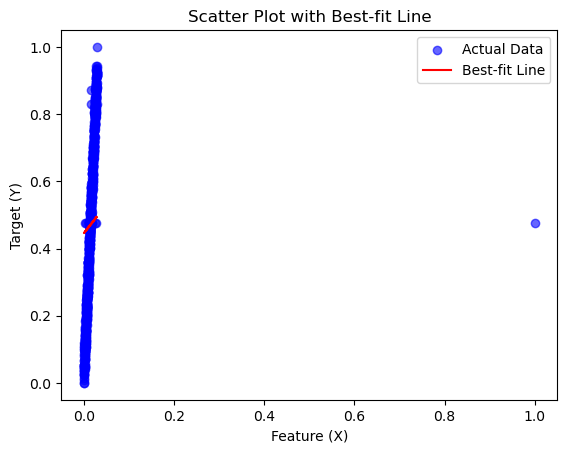

In [540]:
s = np.sort(X)
plt.scatter(X[:,0], Y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X[t:,0].reshape(-1,1), preds, color='red', label='Best-fit Line')
print(X[t:,0].shape, Y.shape)
# Labels and legend
plt.xlabel('Feature (X)')
plt.ylabel('Target (Y)')
plt.title('Scatter Plot with Best-fit Line')
plt.legend()

plt.show()

def predict_3d(x1, x2, theta):
    return theta[0] + theta[1] * x1 + theta[2] * x2

def plot_3d_scatter_with_plane(x1, x2, y, theta):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x1, x2, y, color='blue', label='Data Points', alpha=0.6)

    x1_grid, x2_grid = np.meshgrid(np.linspace(min(x1), max(x1), 20),
                                   np.linspace(min(x2), max(x2), 20))
    y_pred_grid = predict_3d(x1_grid, x2_grid, theta)

    ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='red', alpha=0.5, label='Regression Plane')

    # Axis labels
    ax.set_xlabel("X1 (Feature 1)")
    ax.set_ylabel("X2 (Feature 2)")
    ax.set_zlabel("Y (Predictions)")
    ax.set_title("3D Scatter Plot with Regression Plane")
    plt.legend()
    plt.show()


theta = np.array([b0, b1, b2])  
plot_3d_scatter_with_plane(x1, x2, ypred, theta)

import matplotlib.pyplot as plt
import numpy as np

def plot_best_fit_line(X, Y, theta):
    if X.ndim > 1:
        X = X.flatten()
    
    X_sorted = np.sort(X) 
    print(theta.shape, X_sorted.shape)
    Y_pred = []
    for x in X_sorted:
        Y_pred.append(predict(x, theta))
    
    plt.scatter(X, Y, color='blue', label='Data Points', alpha=0.6)
    
    plt.plot(X_sorted, Y_pred, color='red', label='Best Fit Line', linewidth=2)
    
    plt.xlabel("X (Feature)")
    plt.ylabel("Y (Target)")
    plt.title("Best Fit Line")
    plt.legend()
    plt.show()


df = pd.read_csv('C:/Users/User/Downloads/data_for_LR.csv')
d = df.to_numpy()

# plot_best_fit_line(data[:,0], data[:,1], theta)

plot_best_fit_line(Xtrain, Ytrain, theta)

# plot_best_fit_line(Xtest, Ytest, theta)



In [552]:
def missing_values(df):
    # print(df)
    return df.fillna(df.mean())
def drop_duplicates(df):
    return df.drop_duplicates()
def outliers(df):
    for x in df.columns:
        i = df[x]
        q1, q3 = np.percentile(i, 25), np.percentile(i, 75)
        iqr = q3 - q1
        lower_bound, upper_bound = q1 - (1.5 * iqr), q3 + (1.5 * iqr)
        lower_inds, upper_inds = df[i < q1].index, df[i > q3].index
        df.loc[lower_inds, x] = lower_bound
        df.loc[upper_inds, x] = upper_bound
        print(x, lower_bound, upper_bound)
    # print(df)
    return df
def unit_norm(df):
    for x in df.columns:
        i = df[x]
        mmin, mmax = min(i), max(i)
        df[x] = (i - mmin) / (mmax - mmin)
    # print(df)
    return df
    
def zscore_norm(df):
    for x in df.columns:
        i = df[x]
        mn, sd = np.mean(i), np.std(i)
        df[x] = (i - mn) / (sd)
    return df
def fix(df):
    return unit_norm((drop_duplicates(missing_values(df))))


plt.figure(figsize=(18,18))
sns.heatmap(lgr.corr(), annot=True, linewidth=0.9)

plt.figure(figsize=(18, 18))
plt.imshow(lgr.corr())
plt.colorbar()
plt.show()


class Linear_Regression:
    def __init__(self, lr=0.001, iters=10000):
        self.iters = iters
        self.lr = lr
    def train(self, X, Y):
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        # print(X.shape)
        # self.thetas = np.random.randint(low=int(min(X[0])), high=int(max(X[0])+1), size=(X.shape[1],1))
        self.thetas = np.random.randn(X.shape[1],1)
        gd = 0
        for i in range(self.iters):
            # print(self.derivative_of_cost(X, Y).shape, self.thetas.shape)
            self.thetas -= self.lr * self.derivative_of_cost(X, Y)
            if i % 1000 == 0:
                print('Loss at', i,' is', self.cost(X,Y))
        return self.thetas, self.hyp(X)
    def hyp(self,X):
        # print(X.shape, self.thetas.shape)
        return np.dot(X, self.thetas)
    def cost(self,X,Y):
        return np.mean(np.square(Y - self.hyp(X)))
    def derivative_of_cost(self,X,Y):
        error = Y - self.hyp(X)
        return -2/X.shape[0] * np.dot(X.T, error)
    def test(self, Xt):
        return self.hyp(np.hstack((Xt, np.ones((Xt.shape[0], 1)))))
        
        
lr = Linear_Regression()  
X, Y = linear['x'].to_numpy().reshape(-1,1), linear['y'].to_numpy().reshape(-1,1)
t = int(X.shape[0] * 0.8)
params, preds = lr.train(X[:t],Y[:t])
preds = lr.test(X[t:])
print('test error: ',np.mean(np.square((Y[t:] - preds))), '\n')

lr = Linear_Regression()  
mlr = fix(mlr)
X, Y = mlr.iloc[:,:-1].to_numpy(), mlr.iloc[:,-1].to_numpy().reshape(-1,1)
t = int(X.shape[0] * 0.8)
params, preds = lr.train(X[:t],Y[:t])
preds = lr.test(X[t:])
print('test error: ',np.mean(np.square((Y[t:] - preds))) )

class Logistic_Regression:
    def __init__(self, lr=0.0001, iters=1000):
        self.iters = iters
        self.lr = lr
    def train(self, X, Y):
        X = np.hstack((X, np.ones((X.shape[0],1))))
        self.thetas = np.random.randn(X.shape[1], 1)* 0.01 
        # print(self.thetas.shape)
        for i in range(self.iters):
            self.thetas -= self.lr * self.derivative_of_cost(X, Y)
            if i %100 == 0:
                print('Loss at', i,' is', self.cost(X,Y))
        return self.thetas, self.sig(X)
    def sig(self, X):
        # print('sig',-np.dot(self.thetas.T, X.T))
        # return 1 / (1 + np.exp(-np.dot(self.thetas.T, X.T))).T
        z = np.dot(X, self.thetas)
        return 1 / (1 + np.exp(-np.clip(z, -250, 250))) 
    def cost(self, X, Y):
        preds = self.sig(X)
        return -np.mean(Y * np.log2(preds) + (1-Y) * np.log2(1 - preds))
    def derivative_of_cost(self, X, Y):
        preds = self.sig(X)
        # preds = np.clip(preds, 1e-8, 1 - 1e-8) 
        # print((preds-Y).shape)
        # print((np.dot(X.T, preds-Y) /X.shape[0]).shape)
        return np.dot(X.T, preds-Y) /X.shape[0]
lg = Logistic_Regression()
lx = fix(lgr.iloc[:,[1,2,4,10,11,12,13,14]]).to_numpy()
ly = missing_values(lgr.iloc[:,-1]).to_numpy().reshape(-1,1)
x = np.hstack((lx, missing_values(lgr.iloc[:,:-1])))
lg.train(x, ly)
x.shape

s = np.sort(X)
plt.scatter(X[:,0], Y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X[t:,0].reshape(-1,1), preds, color='red', label='Best-fit Line')
print(X[t:,0].shape, Y.shape)
# Labels and legend
plt.xlabel('Feature (X)')
plt.ylabel('Target (Y)')
plt.title('Scatter Plot with Best-fit Line')
plt.legend()

plt.show()

def predict_3d(x1, x2, theta):
    return theta[0] + theta[1] * x1 + theta[2] * x2

def plot_3d_scatter_with_plane(x1, x2, y, theta):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x1, x2, y, color='blue', label='Data Points', alpha=0.6)

    x1_grid, x2_grid = np.meshgrid(np.linspace(min(x1), max(x1), 20),
                                   np.linspace(min(x2), max(x2), 20))
    y_pred_grid = predict_3d(x1_grid, x2_grid, theta)

    ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='red', alpha=0.5, label='Regression Plane')

    # Axis labels
    ax.set_xlabel("X1 (Feature 1)")
    ax.set_ylabel("X2 (Feature 2)")
    ax.set_zlabel("Y (Predictions)")
    ax.set_title("3D Scatter Plot with Regression Plane")
    plt.legend()
    plt.show()


theta = np.array([b0, b1, b2])  
plot_3d_scatter_with_plane(x1, x2, ypred, theta)

import matplotlib.pyplot as plt
import numpy as np

def plot_best_fit_line(X, Y, theta):
    if X.ndim > 1:
        X = X.flatten()
    
    X_sorted = np.sort(X) 
    print(theta.shape, X_sorted.shape)
    Y_pred = []
    for x in X_sorted:
        Y_pred.append(predict(x, theta))
    
    plt.scatter(X, Y, color='blue', label='Data Points', alpha=0.6)
    
    plt.plot(X_sorted, Y_pred, color='red', label='Best Fit Line', linewidth=2)
    
    plt.xlabel("X (Feature)")
    plt.ylabel("Y (Target)")
    plt.title("Best Fit Line")
    plt.legend()
    plt.show()


df = pd.read_csv('C:/Users/User/Downloads/data_for_LR.csv')
d = df.to_numpy()

# plot_best_fit_line(data[:,0], data[:,1], theta)

plot_best_fit_line(Xtrain, Ytrain, theta)

# plot_best_fit_line(Xtest, Ytest, theta)


class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def calculate_splits(self, feature_column):
        sorted_feature = np.sort(feature_column)
        splits = [(sorted_feature[i] + sorted_feature[i+1]) / 2 for i in range(len(sorted_feature)-1)]
        return splits

    def calculate_entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def calculate_information_gain(self, y, left_y, right_y):
        parent_entropy = self.calculate_entropy(y)
        left_weight = len(left_y) / len(y)
        right_weight = len(right_y) / len(y)
        weighted_entropy = left_weight * self.calculate_entropy(left_y) + right_weight * self.calculate_entropy(right_y)
        info_gain = parent_entropy - weighted_entropy
        return info_gain

    def calculate_best_split(self, X, y, feature_index, is_categorical):
        feature_column = X[:, feature_index]
        if is_categorical:
            unique_values = np.unique(feature_column)
            best_gain = -1
            best_split = None
            for value in unique_values:
                left_indices = feature_column == value
                right_indices = feature_column != value
                left_y, right_y = y[left_indices], y[right_indices]
                if len(left_y) > 0 and len(right_y) > 0:
                    gain = self.calculate_information_gain(y, left_y, right_y)
                    if gain > best_gain:
                        best_gain = gain
                        best_split = value
            return best_split, best_gain
        else:
            possible_splits = self.calculate_splits(feature_column)
            best_gain = -1
            best_split = None
            for split_value in possible_splits:
                left_indices = feature_column < split_value
                right_indices = feature_column >= split_value
                left_y, right_y = y[left_indices], y[right_indices]
                if len(left_y) > 0 and len(right_y) > 0:
                    gain = self.calculate_information_gain(y, left_y, right_y)
                    if gain > best_gain:
                        best_gain = gain
                        best_split = split_value
            return best_split, best_gain

    def fit(self, X, y, depth=0, feature_types=None):
        num_samples, num_features = X.shape
        if num_samples >= self.min_samples_split and depth < self.max_depth:
            best_gain = -1
            b_split = None

            for feature_index in range(num_features):
                is_categorical = feature_types[feature_index] == "categorical"
                split_value, gain = self.calculate_best_split(X, y, feature_index, is_categorical)
                if gain > best_gain:
                    best_gain = gain
                    b_split = {'feature_index': feature_index, 'split_value': split_value, 'is_categorical': is_categorical}

            if b_split is not None:
                feature_column = X[:, b_split['feature_index']]
                if b_split['is_categorical']:
                    left_indices = feature_column == b_split['split_value']
                else:
                    left_indices = feature_column < b_split['split_value']
                right_indices = ~left_indices

                left_subtree = self.fit(X[left_indices], y[left_indices], depth + 1, feature_types)
                right_subtree = self.fit(X[right_indices], y[right_indices], depth + 1, feature_types)
                return {
                    'feature': b_split['feature_index'], 
                    'split_value': b_split['split_value'], 
                    'is_categorical': b_split['is_categorical'],
                    'left': left_subtree, 
                    'right': right_subtree
                }

        return np.bincount(y).argmax()

    def fit_with_types(self, X, y, feature_types):
        self.tree = self.fit(X, y, feature_types=feature_types)
        return self.tree

    def predict(self, X):
        return np.array([self.calculate_prediction(sample, self.tree) for sample in X])
    def predict_single(self, sample):
        return self.calculate_prediction(sample, self.tree)

    def calculate_prediction(self, sample, tree):
        if isinstance(tree, dict):
            feature_value = sample[tree['feature']]
            if tree['is_categorical']:
                branch = tree['left'] if feature_value == tree['split_value'] else tree['right']
            else:
                branch = tree['left'] if feature_value < tree['split_value'] else tree['right']
            return self.calculate_prediction(sample, branch)
        return tree
    def print_tree(self, tree=None, depth=0):
        if tree is None:
            tree = self.tree
        if isinstance(tree, dict):
            feature = tree['feature']
            split_value = tree['split_value']
            split_type = "==" if tree['is_categorical'] else "<"
            print(f"{'|  ' * depth}Feature {feature} {split_type} {split_value}")
            print(f"{'|  ' * depth}--> Left:")
            self.print_tree(tree['left'], depth + 1)
            print(f"{'|  ' * depth}--> Right:")
            self.print_tree(tree['right'], depth + 1)
        else:
            print(f"{'|  ' * depth}Prediction: {tree}")

# Load and preprocess the iris dataset
data = pd.read_csv("./iris.csv", index_col=0)
X = data.drop(columns="Species").values
Y = data["Species"].values
classes, Y = np.unique(Y, return_inverse=True)

# Split into train and test sets
def train_test_split(X, Y, test_size=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split = int(X.shape[0] * (1 - test_size))
    train_indices, test_indices = indices[:split], indices[split:]
    return X[train_indices], X[test_indices], Y[train_indices], Y[test_indices]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape)
# Train the DecisionTree model
feature_types = ["numerical", "numerical", "numerical", "numerical"]
tree = DecisionTree(max_depth=3)
tree.fit_with_types(X_train, Y_train, feature_types)

print("\nDecision Tree Structure:")
tree.print_tree()

# Make individual predictions
sample_index = 0  # Example: Predict the first test sample
sample_prediction = tree.predict_single(X_test[sample_index])
print(f"\nPrediction for sample {sample_index}: {classes[sample_prediction]} (Actual: {classes[Y_test[sample_index]]})")


# Make predictions and calculate accuracy
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

Y_pred = tree.predict(X_test)
acc = accuracy(Y_test, Y_pred)

# Generate confusion matrix
def confusion_matrix(y_true, y_pred, num_classes):
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        matrix[t, p] += 1
    return matrix

conf_mat = confusion_matrix(Y_test, Y_pred, num_classes=len(classes))

# Results
print("Accuracy:", acc)
print("Confusion Matrix:")
print(conf_mat)
print(tree.tree)
data


import numpy as np
import pandas as pd

class RandomForest:
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.trees = []

    def generate_samples(self, X, Y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], Y[indices]

    def fit(self, X, Y, feature_types):
        self.trees = []
        for i in range(self.n_estimators):
            X_sample, y_sample = self.generate_samples(X, Y)
            tree = DecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            tree.fit_with_types(X_sample, y_sample, feature_types)
            self.trees.append(tree)
            print(f"Tree {i + 1}:")
            self.print_tree_structure(tree.tree)

    def predict(self, X_test):
        tree_predictions = np.array([tree.predict(X_test) for tree in self.trees])
        tree_predictions = tree_predictions.T  # Shape: (num_samples, num_trees)
        return np.array([self.majority_vote(preds) for preds in tree_predictions])

    def majority_vote(self, predictions):
        unique, counts = np.unique(predictions, return_counts=True)
        return unique[np.argmax(counts)]

    def confusion_matrix(self, y_true, y_pred):
        unique_labels = np.unique(np.concatenate((y_true, y_pred)))
        num_classes = len(unique_labels)
        matrix = np.zeros((num_classes, num_classes), dtype=int)

        for true, pred in zip(y_true, y_pred):
            matrix[true, pred] += 1

        accuracy = np.trace(matrix) / np.sum(matrix)
        return matrix, accuracy

    def print_tree_structure(self, tree, depth=0):
        if isinstance(tree, dict):
            feature = tree['feature']
            split_value = tree['split_value']
            is_categorical = tree['is_categorical']
            indent = " " * (depth * 4)
            print(f"{indent}Feature {feature}, Split Value: {split_value}, Is Categorical: {is_categorical}")
            self.print_tree_structure(tree['left'], depth + 1)
            self.print_tree_structure(tree['right'], depth + 1)
        else:
            indent = " " * (depth * 4)
            print(f"{indent}Leaf: {tree}")

# Load and preprocess the iris dataset
data = pd.read_csv("./iris.csv", index_col=0)
X = data.drop(columns="Species").values
Y = data["Species"].values
classes, Y = np.unique(Y, return_inverse=True)

# Split into train and test sets
def train_test_split(X, Y, test_size=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split = int(X.shape[0] * (1 - test_size))
    train_indices, test_indices = indices[:split], indices[split:]
    return X[train_indices], X[test_indices], Y[train_indices], Y[test_indices]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Train the RandomForest model
feature_types = ["numerical", "numerical", "numerical", "numerical"]
rf = RandomForest(n_estimators=5, max_depth=3)
rf.fit(X_train, Y_train, feature_types)

# Make predictions and evaluate
Y_pred = rf.predict(X_test)
conf_matrix, acc = rf.confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", acc)

def manual_one_hot_encoding(data, categories=None):
    if categories is None:
        categories = np.unique(data)
    category_mapping = {category: idx for idx, category in enumerate(categories)}
    encoded_array = np.zeros((len(data), len(categories)), dtype=int)
    for row_idx, value in enumerate(data):
        col_idx = category_mapping[value]
        encoded_array[row_idx, col_idx] = 1
    return encoded_array, category_mapping

data = ["cat", "dog", "bird", "cat", "dog", "cat"]

one_hot_encoded, mapping = manual_one_hot_encoding(data)

print("Original Data:", data)
print("Category Mapping:", mapping)
print("One-Hot Encoded Matrix:\n", one_hot_encoded)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PCA with graphs
def pca(data, n_components=2):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    cov_matrix = np.cov(centered_data, rowvar=False)
    eig_values, eig_vectors = np.linalg.eig(cov_matrix)
    indices = np.argsort(eig_values)[::-1]
    eig_vectors = eig_vectors[:, indices][:, :n_components]
    reduced_data = np.dot(centered_data, eig_vectors)

    explained = eig_values[indices][:n_components] / np.sum(eig_values)

    plt.figure(figsize=(6, 4))
    plt.bar(range(len(explained)), explained)
    plt.title('Explained Variance')
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
    plt.title('PCA Scatter')
    plt.show()

    return reduced_data

# Naive Bayes class
class NB:
    def fit(self, x, y):
        self.classes = np.unique(y)
        self.class_priors = {cls: np.mean(y == cls) for cls in self.classes}
        self.feature_params = {}
        for cls in self.classes:
            cls_data = x[y == cls]
            self.feature_params[cls] = {
                'mean': np.mean(cls_data, axis=0),
                'var': np.var(cls_data, axis=0)
            }

    def predict_one(self, x):
        likelihoods = []
        for cls in self.classes:
            mean = self.feature_params[cls]['mean']
            var = self.feature_params[cls]['var']
            prior = self.class_priors[cls]
            likelihood = np.sum(-0.5 * np.log(2 * np.pi * var) - ((x - mean) ** 2) / (2 * var)) + np.log(prior)
            likelihoods.append(likelihood)
        return self.classes[np.argmax(likelihoods)]

    def predict(self, x):
        return np.array([self.predict_one(sample) for sample in x])

    def score(self, x, y):
        preds = self.predict(x)
        return np.mean(preds == y)

# Gaussian Bayes (Multivariate)
class GaussianBayes:
    def __init__(self):
        self.means = {}
        self.covmats = {}
        self.priors = {}
        self.classes = None

    def train(self, X, Y):
        self.classes = np.unique(Y)
        rows, cols = X.shape
        self.means = {i: np.zeros(cols) for i in self.classes}
        self.covmats = {i: np.zeros((cols, cols)) for i in self.classes}
        self.priors = {i: 0 for i in self.classes}

        for c in self.classes:
            self.means[c] = np.mean(X[Y == c], axis=0)
            self.priors[c] = (X[Y == c]).shape[0] / rows
            self.covmats[c] = np.cov(X[Y == c].T)

    def test(self, X):
        pclasses = []
        probability = []
        for i in range(X.shape[0]):
            probs_per_example = {k: 0 for k in self.classes}
            for c in self.classes:
                diff = X[i] - self.means[c]
                denum = ((2 * np.pi) ** (X.shape[1] / 2)) * np.sqrt(np.linalg.det(self.covmats[c]))
                num = -0.5 * (diff.T @ np.linalg.inv(self.covmats[c]) @ diff)
                pxc = np.exp(num) / denum
                probs_per_example[c] = self.priors[c] * pxc
            pclasses.append(max(probs_per_example, key=lambda x: probs_per_example[x]))
            probability.append(max(probs_per_example.values()))

        return pclasses, probability

    def predict(self, X):
        return self.test(X)[0]

# Naive Bayes for Text Classification
class NaiveBayesText:
    def __init__(self, classes):
        self.classes = classes
        self.class_bow = []
        self.class_prob = []
        self.class_total = []

    def addExample(self, x, y):
        pass  # To be implemented

    def train(self, X, Y):
        rows, cols = X.shape
        for idx, c in enumerate(self.classes):
            self.class_bow.append(get_BagofWords(X[Y == c].flatten()))
            self.class_prob.append(len(X[Y == c]) / rows)
            sum_freqs = 0
            for k, v in self.class_bow[idx].items():
                sum_freqs += v
            self.class_total.append(len(X[Y == c]) + sum_freqs)

    def test(self, X):
        nexamples, nfeatures = X.shape
        pclass = []
        for i in range(X.shape[0]):
            fprobs = {k: 0 for k in self.classes}
            x_words = parse_string(X[i])
            for idx, c in enumerate(self.classes):
                pxcs = []
                for j in x_words:
                    if j in self.class_bow[idx]:
                        pxc = self.class_bow[idx][j] + 1
                    else:
                        pxc = 1
                    pxcs.append(pxc / self.class_total[idx])
                log_fx = sum(np.log(p) for p in pxcs)
                fx = log_fx
                fprobs[c] = fx * self.class_prob[idx]
            pclass.append(max(fprobs, key=lambda x: fprobs[x]))

        return np.array(pclass)

    def predict(self, x):
        x_array = np.array(x)
        if x_array.ndim == 1:
            x_array = x_array.reshape([-1, 1])

        return self.test(x_array)[0]

# Example data
x = np.random.rand(100, 5)  # Random data for PCA and Naive Bayes
y = np.random.randint(0, 2, 100)  # Binary labels

# Run PCA
reduced = pca(x)

# Naive Bayes
nb = NB()
nb.fit(x, y)
single_pred_nb = nb.predict_one(x[0])
all_preds_nb = nb.predict(x)
acc_nb = nb.score(x, y)

# Output for PCA
print("Reduced data (PCA):")
print(reduced)

# Output for Naive Bayes
print("\nNaive Bayes:")
print("Single prediction:", single_pred_nb)
print("All predictions:", all_preds_nb)
print("Accuracy:", acc_nb)

# Gaussian Bayes (Multivariate)
bayes = GaussianBayes()
bayes.train(x, y)
single_pred_bayes = bayes.predict(x[0].reshape(1, -1))
all_preds_bayes = bayes.predict(x)

print("\nGaussian Bayes:")
print("Single prediction:", single_pred_bayes)
print("All predictions:", all_preds_bayes)

import numpy as np
import matplotlib.pyplot as plt

def standardize(X):
    """Standardize the input data by subtracting the mean and dividing by the standard deviation."""
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    X_standardized = (X - mean) / std_dev
    return X_standardized

def compute_covariance_matrix(X):
    """Compute the covariance matrix of the input data."""
    n_samples = X.shape[0]
    covariance_matrix = np.dot(X.T, X) / (n_samples - 1)
    return covariance_matrix

def eigen_decomposition(cov_matrix):
    """Compute eigenvalues and eigenvectors from the covariance matrix."""
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

def project_data(X, eigenvectors, n_components):
    """Project the data onto the first n_components eigenvectors (principal components)."""
    W = eigenvectors[:, :n_components] 
    X_pca = np.dot(X, W)
    return X_pca

# Example for any general dataset (e.g., df is your DataFrame)
# Assuming 'df' is your dataframe and you want to drop the 'target_column' for features and keep 'target_column' as labels
# X = df.drop(columns='target_column').values  # Convert to numpy array (features)
# Y = df['target_column'].values  # Target labels (class labels)
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=200, n_features=5, n_informative=3, n_clusters_per_class=2, random_state=42)


# Standardize the data
X_standardized = standardize(X)

# Compute covariance matrix and perform eigen decomposition
cov_matrix = compute_covariance_matrix(X_standardized)
eigenvalues, eigenvectors = eigen_decomposition(cov_matrix)

# Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("Explained variance by each component: {}".format(explained_variance_ratio))

# Project the data onto 2 principal components
X_pca = project_data(X_standardized, eigenvectors, n_components=2)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Class Label')

# Add axis labels showing the variance explained by each principal component
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0] * 100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1] * 100:.2f}% Variance)')
plt.title('PCA on General Dataset (2 Components)')

plt.show()

# PROJECTIONS
# can freely choose values of a and b, and find value of c to satisfy equation v1.v2 = 0
a = 1  
b = 0  
x = v1[0] * a
y = v1[1] * b
c = -(x + y) / v1[2]
v2 = np.array([a, b, c])
print(np.dot(v1,v2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='r', label='v1', length=4.0, normalize=True)
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='b', label='v2', length=4.0, normalize=True)
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 10])
ax.set_zlim([-1, 8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()
# ORTHOGNALS
v1ov2 = (np.dot(v1, v2)/np.dot(v2, v2))*v2
v2ov1 = (np.dot(v2, v1)/np.dot(v1, v1))*v1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='r', label='v1', length=3.0, normalize=True)
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='b', label='v2', length=3.0, normalize=True)
ax.quiver(0, 0, 0, v1ov2[0], v1ov2[1], v1ov2[2], color='g', label='proj v1 on v2', length=1.0, normalize=True)
ax.quiver(0, 0, 0, v2ov1[0], v2ov1[1], v2ov1[2], color='m', label='proj v2 on v1', length=1.0, normalize=True)
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 10])
ax.set_zlim([-1, 8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()
# RECONSTRUCTEDSS
og_v1 = v1ov2 + (v1 - v1ov2)  
og_v2 = v2ov1 + (v2 - v2ov1)  

print("Original v1:", v1)
print("Reconstructed v1:", og_v1)

print("Original v2:", v2)
print("Reconstructed v2:", og_v2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='r', label='Original v1', length=4.0, normalize=True)
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='b', label='Original v2', length=4.0, normalize=True)
ax.quiver(0, 0, 0, og_v1[0], og_v1[1], og_v1[2], color='g', linestyle='dashed', label='Reconstructed v1', length=4.0, normalize=True)
ax.quiver(0, 0, 0, og_v2[0], og_v2[1], og_v2[2], color='m', linestyle='dashed', label='Reconstructed v2', length=4.0, normalize=True)
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 10])
ax.set_zlim([-1, 8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

np.random.seed(42)
v3 = np.random.uniform(low=1, high=10, size=3)
v4 = np.random.uniform(low=1, high=10, size=3)

v3ov4 = (np.dot(v3, v4)/np.dot(v4, v4))*v4
v4ov3 = (np.dot(v4, v3)/np.dot(v3, v3))*v3
perp_v3 = v3- v3ov4
perp_v4 = v4- v4ov3

og_v3 = v3ov4 + perp_v3
og_v4 = v4ov3 + perp_v4

# Print the results
print("Original v3:", v3)
print("Original v4:", v4)
print("Projection of v3 on v4 (v3ov4):", v3ov4)
print("Projection of v4 on v3 (v4ov3):", v4ov3)
print("Reconstructed v3 (og_v3):", og_v3)
print("Reconstructed v4 (og_v4):", og_v4)
# Take two vectors and project one on the other, and find the initial vectors from the projections.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], color='r', label='Original v3', length=10.0, normalize=True)
ax.quiver(0, 0, 0, v4[0], v4[1], v4[2], color='b', label='Original v4', length=10.0, normalize=True)
ax.quiver(0, 0, 0, v3ov4[0], v3ov4[1], v3ov4[2], color='g', linestyle='dashed', label='v3ov4', length=14.0, normalize=True)
ax.quiver(0, 0, 0, v4ov3[0], v4ov3[1], v4ov3[2], color='m', linestyle='dashed', label='v4ov3', length=14.0, normalize=True)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()
# ZERO CENTER PLOT
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
slm = df['SepalLengthCm'].mean()
swm = df['SepalWidthCm'].mean()
plm = df['PetalLengthCm'].mean()
pwm = df['PetalWidthCm'].mean()

rows = df.shape[0]
mean = np.array([slm, swm, plm, pwm]).reshape(-1,1)
mean = np.dot(np.ones((1,rows)).T, mean.T)
df_new = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].to_numpy()
z = df_new - mean

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i in range(4):
    axes[i].hist(z[:, i], bins=20, edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Deviation of {feature_names[i]}')
    axes[i].set_xlabel('Deviation')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# MEAN WRT BEFORE ZERO CENTER:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
means = [slm, swm, plm, pwm]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=20, edgecolor='k', alpha=0.7)
    axes[i].axvline(means[i], color='r', linestyle='--', label='Mean')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()
# AFTER ZER CENRING:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    centered_feature = z[:, i]
    axes[i].hist(centered_feature, bins=20, edgecolor='k', alpha=0.7)
    axes[i].axvline(0, color='r', linestyle='--', label='Mean (0)')
    axes[i].set_title(f'Distribution of {feature} After Zero-Centering')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

# MAHAL DIST
mahal = []
for i in range(len(sda)-1):
    diff = sda[i] - sda[i+1]
    diff = diff.reshape([-1,1])
#     print(diff.shape, inv_cov_mat.shape, diff.T.shape)
    m = np.dot(diff.T, inv_cov_mat)
    m = np.dot(m, diff)
    mahal.append(m)
mahal

# KFOLD
def k_fold_cross_validation(X, y, k=5):
    fold_size = len(X) // k
    accuracies = []
    
    for fold in range(k):
        # Split data into train and test sets for the current fold
        test_indices = list(range(fold * fold_size, (fold + 1) * fold_size))
        train_indices = list(set(range(len(X))) - set(test_indices))
        
        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]
        
        # Train model
        weights = train_logistic_regression(X_train, y_train)
        
        # Evaluate accuracy on test set
        acc = accuracy(X_test, y_test, weights)
        accuracies.append(acc)
        
    return np.mean(accuracies)

# Run K-Fold Cross Validation
average_accuracy = k_fold_cross_validation(X, y, k=5)
print(f'Average Accuracy: {average_accuracy:.4f}')

# KNN
class KNN:
    def __init__(self):
        self.X = None
        self.Y = None
        self.kvals = [3,5,7,9,11]

    def train (self, Xtrain, Ytrain):
        self.X = Xtrain
        self.Y = Ytrain
#         print(sX.shape, Xtrain.shape)
        
    def test (self, Xtest):
        predsperkval = [] 
        for i in range(Xtest.shape[0]):
#             predsperkval.append(get_predictions(Xtest[i], X, Y))
            predsperkval.append(self.predict(Xtest[i]))
        return predsperkval
    
    def predict(self, x):
        dist = []
#         print(X.shape)
        for i in range(self.X.shape[0]):
            dist.append(np.sqrt(sum((x-X[i])**2)))
#             print('test', x, 'trainpt', i,  'dist', np.sqrt(sum((x - i) ** 2)))
        sorted_index = np.argsort(dist)
        preds = {i:None for i in kvals}
#         print(len(dist))
        for k in self.kvals:
            c = self.Y[[sorted_index[:k]]].flatten()
#             print(c)
            values, counts = np.unique(c, return_counts=True)

            ind = np.argmax(counts)
            preds[k] = values[ind]
        return preds
Xtrain, Ytrain, Xtest, Ytest = split_data(X,Y)
# Xtrain.shape
kvals = [3,5,7,9,11]
kn = KNN()
kn.train(Xtrain, Ytrain)
# print(Ytest)
predictions=kn.test(Xtest)
accs = {i:0 for i in kvals}
for k in kvals:
    for i in range(len(predictions)):
        p = predictions[i]
        actual = Ytest[i]
        predicted = p[k]
        if predicted == actual:
            accs[k] += 1
#             print(Xtest[i], k)
    accs[k]  /= len(predictions)
print(accs)

import matplotlib.pyplot as plt
Kvalues, Accuracies = list(accs.keys()),list(accs.values())
print(Kvalues, Accuracies)
plt.plot(Kvalues, Accuracies,color='green', marker='x', markerfacecolor ='green' , linewidth=2, markersize=10)


font1 = {'family':'serif','color':'darkblue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("K values and Accuracies Relationship", fontdict = font1)
plt.xlabel("K-Values", fontdict = font2)
plt.ylabel("Acuuracies", fontdict = font2)
        